### Question-20
# A. Daily attendance of bike tracks
every row contains the number of bicycles on every track of the city(montreal), 
for every day of the year.
Can you infer anything from the attendence record?

url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

1. Read 
2. Check head 
3. Check summary statistics 
4. plot the daily attendance of two tracks, 'Berri1', 'PierDup'
5. Check index , explore weekday_name attributes 
6. Get sum of all attendance as a function of the weekday
7. Display this in figure , what is the inference?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

In [3]:
path = r"code\data\bikes.csv"

In [4]:
bike = pd.read_csv(path)

In [5]:
bike.head()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0


In [6]:
bike.columns

Index(['Date', 'Unnamed: 1', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc',
       'PierDup', 'Rachel1', 'Totem_Laurier'],
      dtype='object')

In [7]:
bike.index

RangeIndex(start=0, stop=261, step=1)

In [8]:
bike.shape,bike.size

((261, 10), 2610)

In [9]:
bike.nunique()

Date             261
Unnamed: 1         1
Berri1           254
CSC              205
Mais1            244
Mais2            247
Parc             242
PierDup          201
Rachel1          251
Totem_Laurier    211
dtype: int64

In [10]:
bike['Unnamed: 1'].unique()

array(['00:00'], dtype=object)

In [11]:
bike.drop(columns='Unnamed: 1',inplace=True)
bike.columns

Index(['Date', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc', 'PierDup', 'Rachel1',
       'Totem_Laurier'],
      dtype='object')

### Check summary statistics

In [12]:
bike.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


### Plot the daily attendance of two tracks, 'Berri1', 'PierDup'

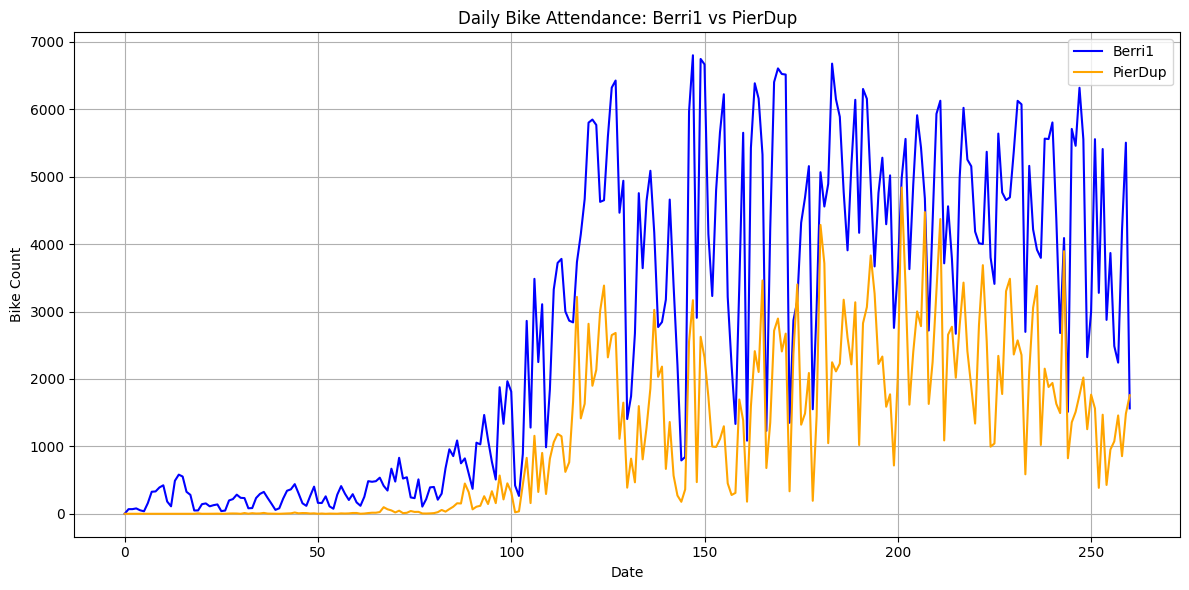

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(bike['Berri1'], label='Berri1', color='blue')
plt.plot(bike['PierDup'], label='PierDup', color='orange')

plt.title('Daily Bike Attendance: Berri1 vs PierDup')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Total no:of bikes on each track in all dates

In [51]:
track_total = bike.drop(columns='Date').sum(axis=0)
track_total

Berri1           716025
CSC              318905
Mais1            458731
Mais2            841498
Parc             435720
PierDup          300903
Rachel1          805035
Totem_Laurier    485145
dtype: int64

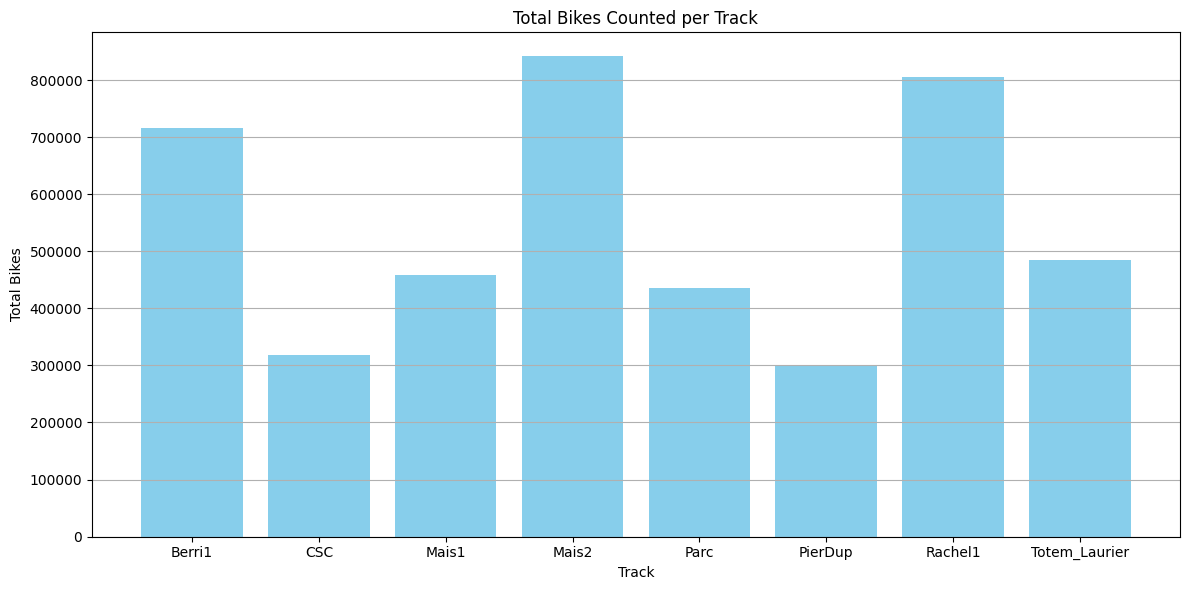

In [52]:
plt.figure(figsize=(12,6))
plt.bar(track_total.index,track_total.values,color='skyblue')
plt.xlabel('Track')
plt.ylabel('Total Bikes')
plt.title('Total Bikes Counted per Track')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Check index , explore weekday_name attributes 

In [15]:
#Converting date column type from str to timestamp
bike['Date'][0],type(bike['Date'][0])
bike['Date']=pd.to_datetime(bike['Date'],format="%d/%m/%Y")
bike['Date'][0],type(bike['Date'][0])

(Timestamp('2013-01-01 00:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

In [17]:
#bike['Date'][0].day_name()
bike['Date'].dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
256     Saturday
257       Sunday
258       Monday
259      Tuesday
260    Wednesday
Name: Date, Length: 261, dtype: object

In [18]:
#Creating a new column day which describes about weekday_name attribute
bike['day']=bike['Date'].dt.day_name()
bike.head()

,Date,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,day
0,2013-01-01,0,0,1,0,6,0,1,0,Tuesday
1,2013-01-02,69,0,13,0,18,0,2,0,Wednesday
2,2013-01-03,69,2,21,6,22,1,0,0,Thursday
3,2013-01-04,80,0,22,4,16,0,125,0,Friday
4,2013-01-05,52,4,19,3,12,0,97,0,Saturday


In [19]:
#creating a new col named week_day which describes about weekday attribute
#[monday - 0 to sunday - 6]
bike['week_day'] = bike['Date'].dt.weekday
bike.head()

,Date,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,day,week_day
0,2013-01-01,0,0,1,0,6,0,1,0,Tuesday,1
1,2013-01-02,69,0,13,0,18,0,2,0,Wednesday,2
2,2013-01-03,69,2,21,6,22,1,0,0,Thursday,3
3,2013-01-04,80,0,22,4,16,0,125,0,Friday,4
4,2013-01-05,52,4,19,3,12,0,97,0,Saturday,5


In [20]:
#creating a new col named Day_type which describes about wheather it is weekend or weekday
bike['Day_type'] = ['Week_end' if day in ['Sunday', 'Saturday'] else 'Week_day' for day in bike['day']]
bike['Day_type'].nunique()

2

In [64]:
bike.columns

Index(['Date', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc', 'PierDup', 'Rachel1',
       'Totem_Laurier', 'day', 'week_day', 'Day_type'],
      dtype='object')

### Total No:of attendances from all tracks within each day

In [22]:
bike['Total_bikes_per_day'] = bike.drop(columns=['Date','day','Day_type','week_day']).sum(axis=1)
bike.head()

,Date,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,day,week_day,Day_type,Total_bikes_per_day
0,2013-01-01,0,0,1,0,6,0,1,0,Tuesday,1,Week_day,8
1,2013-01-02,69,0,13,0,18,0,2,0,Wednesday,2,Week_day,102
2,2013-01-03,69,2,21,6,22,1,0,0,Thursday,3,Week_day,121
3,2013-01-04,80,0,22,4,16,0,125,0,Friday,4,Week_day,247
4,2013-01-05,52,4,19,3,12,0,97,0,Saturday,5,Week_end,187


In [24]:
bike.columns, bike['Total_bikes_per_day'].sum(axis=0)

(Index(['Date', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc', 'PierDup', 'Rachel1',
        'Totem_Laurier', 'day', 'week_day', 'Day_type', 'Total_bikes_per_day'],
       dtype='object'),
 4361962)

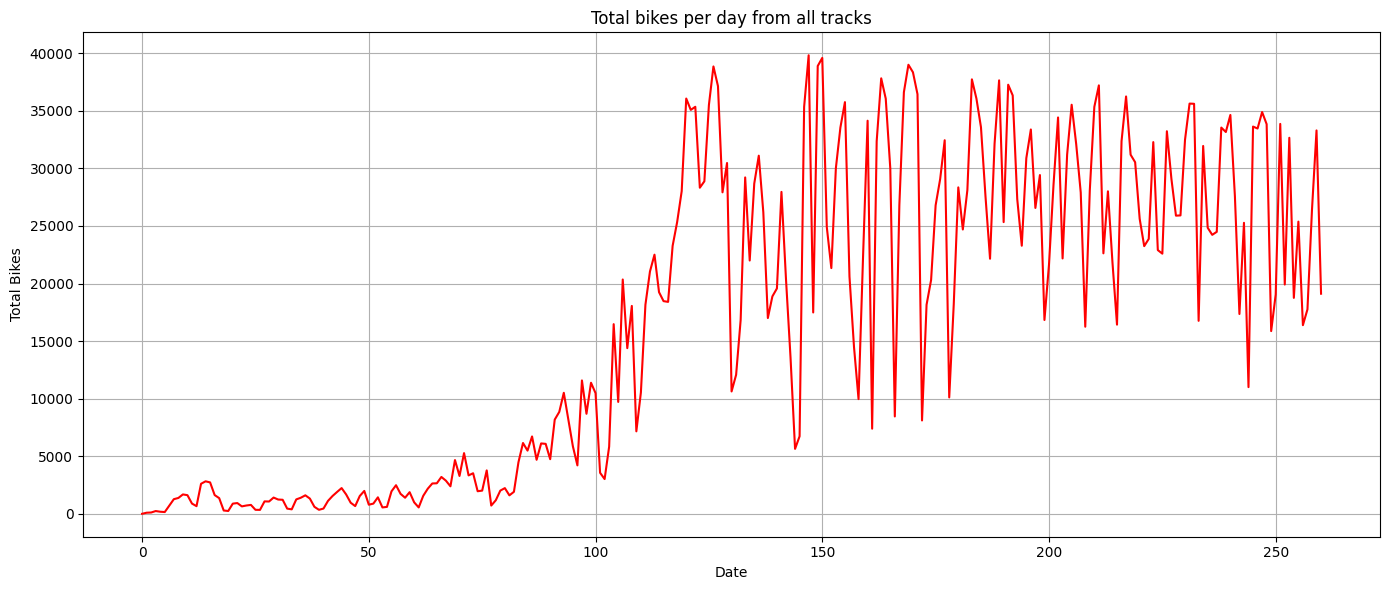

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(bike['Total_bikes_per_day'],'r-')
plt.title('Total bikes per day from all tracks')
plt.xlabel('Date')
plt.ylabel('Total Bikes')
plt.grid(True)
plt.tight_layout()
plt.show()


### Get sum of all attendance as a function of the weekday

In [31]:
bike.groupby(['week_day','day']).agg({'Total_bikes_per_day':'sum'})

,,Total_bikes_per_day
week_day,day,
0,Monday,662902
1,Tuesday,705161
2,Wednesday,732606
3,Thursday,690471
4,Friday,640301
5,Saturday,463944
6,Sunday,466577


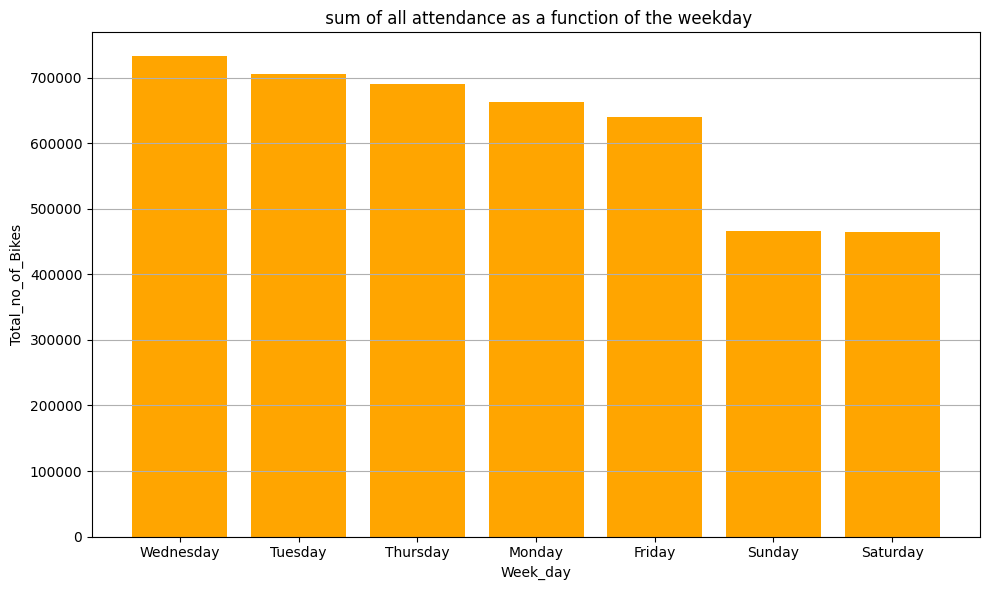

In [29]:
day_vs_total = bike.groupby('day').agg({'Total_bikes_per_day': 'sum'}).sort_values('Total_bikes_per_day',ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(day_vs_total.index, day_vs_total.Total_bikes_per_day, color="orange")
plt.xlabel("Week_day")
plt.ylabel("Total_no_of_Bikes")
plt.title('sum of all attendance as a function of the weekday')
plt.grid(axis="y")
plt.tight_layout()
plt.show()



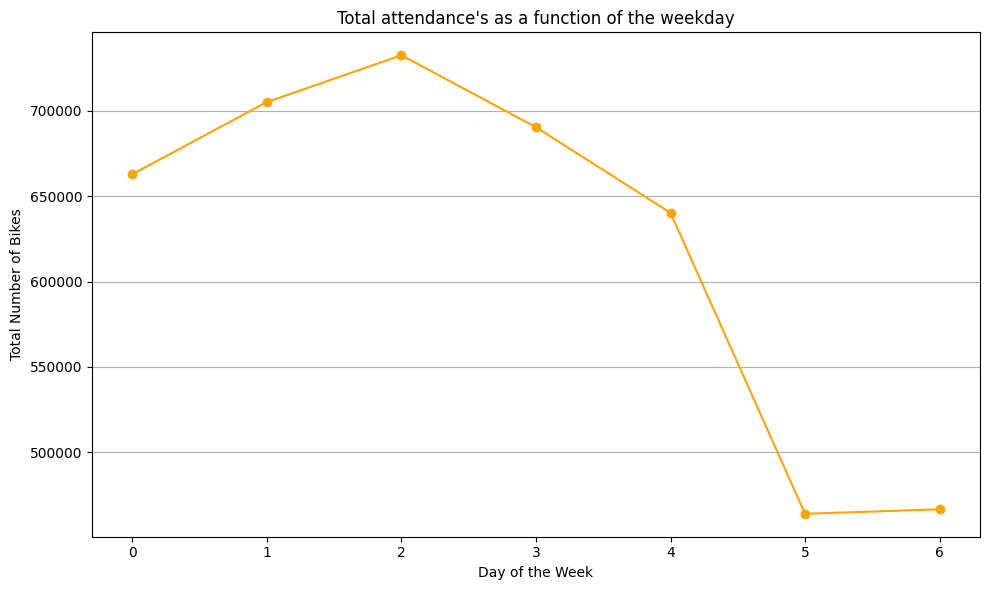

In [30]:
day_vs_total = bike.groupby('week_day').agg({'Total_bikes_per_day': 'sum'})

plt.figure(figsize=(10, 6))
plt.plot(day_vs_total.index, day_vs_total['Total_bikes_per_day'], marker='o', linestyle='-', color='orange')
plt.title("Total attendance's as a function of the weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Total Number of Bikes")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Get sum of all attendance as a function of the weekday , what is the inference?

Inference : 
There are more attendances on weekdays than on weekends. Among the weekdays, Wednesday has the highest number of bikes, followed by Tuesday and Thursday. 
This shows that we can see more bikes on the tracks in the middle of the week.

### Which days have the most bike traffic weekend or weekday

In [34]:
bike.groupby('Day_type').agg({'Total_bikes_per_day':'sum'})

,Total_bikes_per_day
Day_type,
Week_day,3431441
Week_end,930521


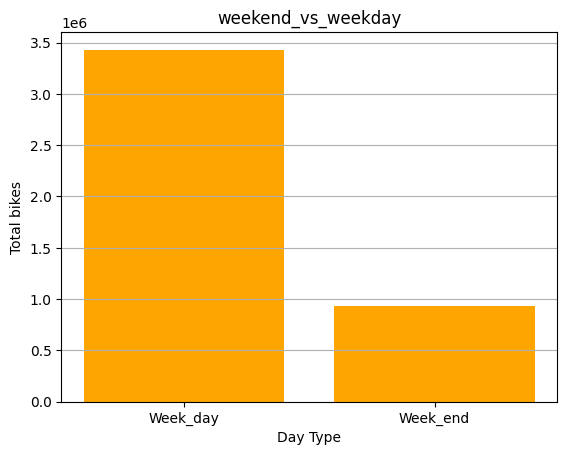

In [35]:
weekend_vs_weekday = bike.groupby('Day_type').agg({'Total_bikes_per_day':'sum'})
plt.bar(weekend_vs_weekday.index,weekend_vs_weekday.Total_bikes_per_day,color="orange")
plt.xlabel("Day Type")
plt.ylabel("Total bikes")
plt.title("weekend_vs_weekday")
plt.grid(axis="y")
plt.show()